# 8. Check If It Is a Straight Line

You are given an array coordinates, coordinates[i] = [x, y], where [x, y] represents the coordinate of a point. Check if these points make a straight line in the XY plane.

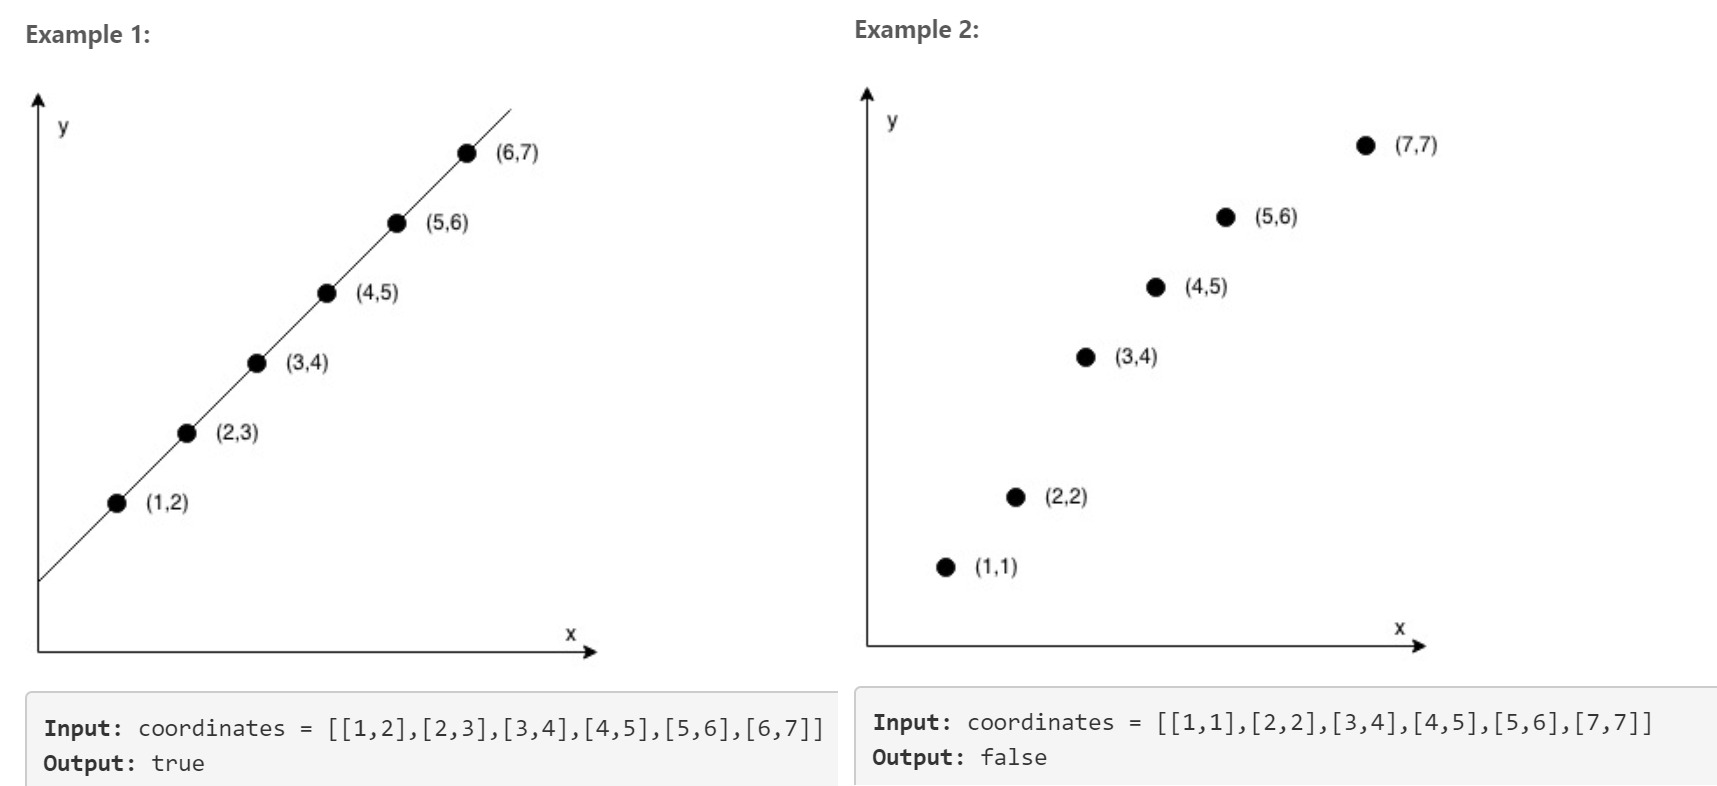

In [6]:
from IPython.display import Image
Image(filename = '.\Check If It Is a Straight Line.jpg', width=600, height=600)

In [25]:
def checkStraightLine(coordinates) -> bool:
    import numpy as np
    coord = np.array(coordinates)
    N = len(coord)
    if N == 2:
        return True
    
    vect1 = coord[1]-coord[0]
    for i in range(2,N):
        if np.cross(vect1,(coord[i]-coord[i-1])) != 0:
            return False
        else: 
            return True
# Runtime: 124 ms
# Memory Usage: 29.3 MB

In [40]:
coordinates1 = [[1,2],[2,3],[3,4],[4,5],[5,6],[6,7]]
coordinates2 = [[1,1],[2,2],[3,4],[4,5],[5,6],[7,7]]
checkStraightLine(coordinates1)
coordinates1[1][1]-coordinates1[1][0]

1

# 9. Valid Perfect Square — Binary Search

Given a positive integer num, write a function which returns True if num is a perfect square else False.  
**Note: Do not use any built-in library function such as sqrt.**  

Example 1:  
Input: 16  
Output: true

Example 2:  
Input: 14  
Output: false

In [89]:
def isPerfectSquare(num) -> bool: #bibary search
    if num == 1:
        return True
    low, high = 2, num
    while low <= high:       
        mid = (low + high)// 2 
        if mid**2 == num:
            return True
        elif mid**2 > num:
            high = mid - 1
        else:
            low = mid + 1 
    return False

**!!!Actually, for square case, set low = 2, high = num //2 is the most fast way.!!!**

In [90]:
for num in range(1,10):
    print(num,isPerfectSquare(num))

1 True
2 False
3 False
4 True
5 False
6 False
7 False
8 False
9 True


# 10. Find the Town Judge

n a town, there are N people labelled from 1 to N.  There is a rumor that one of these people is secretly the town judge.

If the town judge exists, then:

The town judge trusts nobody.
Everybody (except for the town judge) trusts the town judge.
There is exactly one person that satisfies properties 1 and 2.
You are given trust, an array of pairs trust[i] = [a, b] representing that the person labelled a trusts the person labelled b.

If the town judge exists and can be identified, return the label of the town judge.  Otherwise, return -1.

Example 1:  
Input: N = 2, trust = [[1,2]]  
Output: 2  

Example 2:  
Input: N = 3, trust = [[1,3],[2,3]]  
Output: 3  

Example 3:  
Input: N = 3, trust = [[1,3],[2,3],[3,1]]  
Output: -1

Example 4:  
Input: N = 3, trust = [[1,2],[2,3]]  
Output: -1

Example 5:  
Input: N = 4, trust = [[1,3],[1,4],[2,3],[2,4],[4,3]]  
Output: 3

**My Solution -— dict is not necessary, just count the number, Solution 2 in reference**

In [103]:
def findJudge(N,trust) -> int:
    from collections import defaultdict
    d = defaultdict(list)
    dic = defaultdict(list)
    
    if N==1 and len(trust)==0:
        return 1
    for i in range(len(trust)):
        d[trust[i][1]].append(trust[i][0]) #record person is trusted by which people
        dic[trust[i][0]].append(trust[i][1])#record people trust which people
    for j in d:
        if len(d[j])==(N-1) and j not in dic: 
            #judge is trusted by N-1 people except himself
            return j 
    return -1
# Runtime: 800 ms
# Memory Usage: 18.3 MB
#Your runtime beats 50.86 % of python3 submissions.

In [104]:
N = 4
trust = [[1,2],[1,3],[2,1],[2,3],[1,4],[4,3],[4,1]]
findJudge(N,trust)

defaultdict(<class 'list'>, {2: [1], 3: [1, 2, 4], 1: [2, 4], 4: [1]})
defaultdict(<class 'list'>, {1: [2, 3, 4], 2: [1, 3], 4: [3, 1]})


3

**Solution 2**

In [105]:
def findJudge2(N, trust) -> int:
    society_level = [0 for i in range(N)]
    suspicion_level = [0 for i in range(N)]

    for el in trust:
        society_level[el[1] - 1] += 1 #person trusted by how many people == N-1
        suspicion_level[el[0] - 1] += 1 # perspn trusts how many people == 0
    print(society_level)
    print(suspicion_level)
    for i in range(N):
        if society_level[i] == N - 1:
            if suspicion_level[i] == 0:
                return i + 1

    return -1

# 11. Flood Fill

An image is represented by a 2-D array of integers, each integer representing the pixel value of the image (from 0 to 65535).
 
Given a coordinate (sr, sc) representing the starting pixel (row and column) of the flood fill, and a pixel value newColor, "flood fill" the image.

To perform a "flood fill", consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color as the starting pixel), and so on. Replace the color of all of the aforementioned pixels with the newColor.

At the end, return the modified image.

Example 1:  
Input:   
image = [[1,1,1],[1,1,0],[1,0,1]]   
sr = 1, sc = 1, newColor = 2  
Output: [[2,2,2],[2,2,0],[2,0,1]]  
 
Explanation:   
From the center of the image (with position (sr, sc) = (1, 1)), all pixels connected by a path of the same color as the starting pixel are colored with the new color.  
Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.
Note:

The length of image and image[0] will be in the range [1, 50].
The given starting pixel will satisfy 0 <= sr < image.length and 0 <= sc < image[0].length.
The value of each color in image[i][j] and newColor will be an integer in [0, 65535].

In [30]:
def floodFill(image, sr: int, sc: int, newColor: int):
    oldColor = image[sr][sc]
    R,C = len(image),len(image[0])
    if oldColor == newColor:
        return image
    
    def dfs(i,j):
        if image[i][j]==oldColor:
            image[i][j]=newColor
            if i >= 1: dfs(i-1,j) 
            if i < R-1: dfs(i+1,j)
            if j >= 1: dfs(i,j-1)
            if j < C-1: dfs(i,j+1)
    dfs(sr,sc)
    return image

In [31]:
image = [[1,1,1],[1,1,0],[1,0,1]]
sr = 1
sc = 1
newColor = 2

floodFill(image, sr, sc, newColor)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

# 12. Single Element in a Sorted Array

ou are given a **sorted array** consisting of only integers where every element appears exactly twice, except for one element which appears exactly once. Find this single element that appears only once.

Example 1:  
Input: [1,1,2,3,3,4,4,8,8]  
Output: 2 

Example 2:  
Input: [3,3,7,7,10,11,11]  
Output: 10  
 
Note: Your solution should run in **O(log n) time and O(1) space ???**.

**Solution 1 -- collections.Counter**

In [25]:
def singleNonDuplicate(nums) -> int:
    from collections import Counter
    d = Counter(nums)
    return [i for i in d if d[i] == 1][0]

nums1 = [1,1,2,3,3,4,4,8,8]
singleNonDuplicate(nums1)

2

**Solution 2 -- XOR ^**

In [26]:
def singleNonDuplicate2(nums) -> int:
    res = nums[0]
    for i in nums[1:]:
        res ^= i
    return res
nums2 = [3,3,7,7,10,11,11]
singleNonDuplicate2(nums2)

10

**Solution 3 -- Binary Search**

# 13. Remove K Digits -- Stack FIFO

Given a non-negative integer num represented as a string, remove k digits from the number so that the new number is the smallest possible.

Note:
The length of num is less than 10002 and will be ≥ k.  
The given num does not contain any leading zero.  

Example 1:  
Input: num = "1432219", k = 3  
Output: "1219"  
Explanation: Remove the three digits 4, 3, and 2 to form the new number 1219 which is the smallest.

Example 2:   
Input: num = "10200", k = 1   
Output: "200"  
Explanation: Remove the leading 1 and the number is 200. Note that the output must not contain leading zeroes.

Example 3:  
Input: num = "10", k = 2  
Output: "0"  
Explanation: Remove all the digits from the number and it is left with nothing which is 0.

In [60]:
def removeKdigits(num, k) -> str:
    if len(num)==k:  #consider case of len(num)=k
        return '0'

    stack = []
    for i in num:
        while stack and k and stack[-1] > i:  #tranversal num,pop bigger stack[-1] comparing to i
            stack.pop()
            k -= 1
        stack.append(i)
    
    while k: #when removing less than k, continue pop
        stack.pop()
        k -= 1
    return str(int("".join(stack)))    

In [64]:
num,k = "1432219",3
print(removeKdigits(num, k))
num2,k2 = "112",1
print(removeKdigits(num2, k2))

1219
11


# 14. Implement Trie (Prefix Tree)

Implement a trie with insert, search, and startsWith methods.

Example:

Trie trie = new Trie();  

trie.insert("apple");  
trie.search("apple");   // returns true  
trie.search("app");     // returns false  
trie.startsWith("app"); // returns true  
trie.insert("app");     
trie.search("app");     // returns true  

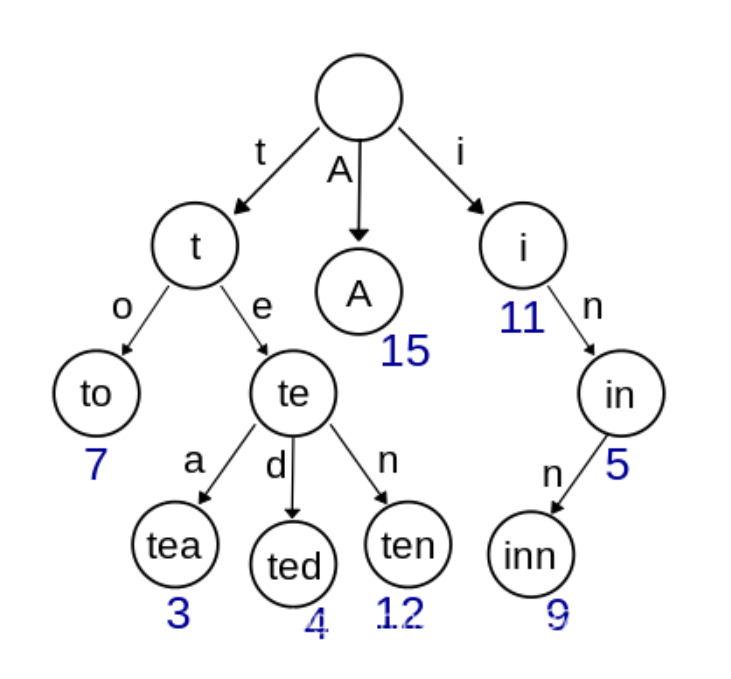

In [4]:
from IPython.display import Image
Image(filename = '.\prefix tree.jpg', width=200, height=200)

**dictionary tree**  
上图是一棵Trie树，表示一个保存了8个键的trie结构，“A”, “to”, “tea”, “ted”, “ten”, “i”, “in”, and “inn”.。

归纳出Trie树的基本性质：
- 根节点不包含字符，除根节点外的每一个子节点都包含一个字符。
- 从根节点到某一个节点，路径上经过的字符连接起来，为该节点对应的字符串。
- 每个节点的所有子节点包含的字符互不相同。
- 通常在实现的时候，会在节点结构中设置一个标志，用来标记该结点处是否构成一个单词（关键字）。
- Trie树的关键字一般都是字符串，而且Trie树把每个关键字保存在一条路径上，而不是一个结点中。另外，两个有公共前缀的关键字，在Trie树中前缀部分的路径相同，所以Trie树又叫做前缀树（Prefix Tree）。

In [ ]:
class Node(object):
    def __init__(self):
        self.children = collections.defaultdict(Node)
        self.isword = False
        
class Trie(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.root = Node() #initialize root node with no char

    def insert(self, word):
        """
        Inserts a word into the trie.
        :type word: str
        :rtype: void
        """
        current = self.root 
        for w in word:
            current = current.children[w]
        current.isword = True #insert it and label a word

    def search(self, word):
        """
        Returns if the word is in the trie.
        :type word: str
        :rtype: bool
        """
        current = self.root
        for w in word:
            current = current.children.get(w)
            if current == None:
                return False
        return current.isword

    def startsWith(self, prefix):
        """
        Returns if there is any word in the trie that starts with the given prefix.
        :type prefix: str
        :rtype: bool
        """
        current = self.root
        for w in prefix:
            current = current.children.get(w)
            if current == None:
                return False
        return True        


# Your Trie object will be instantiated and called as such:
# obj = Trie()
# obj.insert(word)
# param_2 = obj.search(word)
# param_3 = obj.startsWith(prefix)

In [ ]:
class Node(object):
    def __init__(self):
        self.children = collections.defaultdict(Node)
        self.isword = False
        
class Trie(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.root = Node()

    def insert(self, word):
        """
        Inserts a word into the trie.
        :type word: str
        :rtype: void
        """
        current = self.root
        for w in word:
            current = current.children[w]
        current.isword = True

    def search(self, word):
        """
        Returns if the word is in the trie.
        :type word: str
        :rtype: bool
        """
        current = self.root
        for w in word:
            current = current.children.get(w)
            if current == None:
                return False
        return current.isword

    def startsWith(self, prefix):
        """
        Returns if there is any word in the trie that starts with the given prefix.
        :type prefix: str
        :rtype: bool
        """
        current = self.root
        for w in prefix:
            current = current.children.get(w)
            if current == None:
                return False
        return True        


# Your Trie object will be instantiated and called as such:
# obj = Trie()
# obj.insert(word)
# param_2 = obj.search(word)
# param_3 = obj.startsWith(prefix)